In [81]:
import sys; sys.path.insert(0, '..') # necessary for successful custom module imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from models.jump_vasicek import JumpVasicek
from models.vasicek import Vasicek
from pricing.pricing import Pricing
from models.cir import CIR
from models.jump_cir import JumpCIR
import warnings
warnings.filterwarnings("ignore")

# VASICEK - BOND

In [82]:
fitted_params = {
    "kappa": 32.18,
    "mu_r": 0.0009042,
    "sigma": 0.00146,
    "mu": 0,
    "gamma": 0.01,
    "h": 10
}

In [83]:
xls = pd.ExcelFile('../data/yield_curve15022021.xlsx')
yield_curve = pd.read_excel(xls, 'Sheet1')
yield_curve = yield_curve.set_index('Dates')

In [84]:
yield_curve_2_5_21 = pd.DataFrame((yield_curve[yield_curve.index == '2/5/2021']).T.values/100)
yield_curve_2_5_21['DATE'] = yield_curve.columns
yield_curve_2_5_21.columns = ['YIELD','DATE']

In [85]:
def convert_to_years(row):
    if 'M' in row['DATE']:
        return int(row['DATE'].split('M')[0])/12
    elif 'Y' in row['DATE']:
        return int(row['DATE'].split('Y')[0])
    
yield_curve_2_5_21['YEARS'] = yield_curve_2_5_21.apply(convert_to_years, axis=1)

In [86]:
yield_curve_2_5_21['PRICE'] = np.exp(-yield_curve_2_5_21['YEARS']*yield_curve_2_5_21['YIELD'])
yield_curve_2_5_21 = yield_curve_2_5_21.set_index('DATE')

In [87]:
vasicek = Vasicek(fitted_params)
pricing = Pricing(vasicek)

In [88]:
prices = np.empty(len(yield_curve_2_5_21))
std = np.empty(len(yield_curve_2_5_21))

i = 0
for t in yield_curve_2_5_21['YEARS'].values:
    prices[i], std[i] = pricing.bond_price(26, 0.001, 100, t)
    i = i+1

In [89]:
yield_curve_2_5_21['PREDICTED PRICE'] = prices

<AxesSubplot:title={'center':'VASICEK - BOND PRICES'}, xlabel='DATE'>

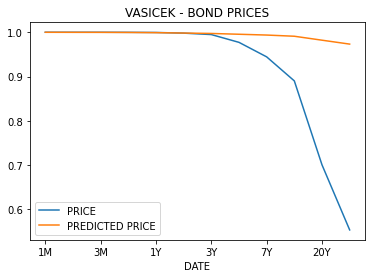

In [90]:
yield_curve_2_5_21[['PRICE', 'PREDICTED PRICE']].plot(legend=True, title='VASICEK - BOND PRICES')

In [91]:
std

array([1.35957839e-10, 4.04002848e-10, 3.53368979e-10, 5.38936965e-10,
       1.11374062e-09, 2.13075024e-09, 4.13575141e-09, 6.85292849e-09,
       9.68197382e-09, 1.02145649e-08, 2.64425476e-08, 3.29874613e-08])

In [98]:
abs(yield_curve_2_5_21['PRICE'] - yield_curve_2_5_21['PREDICTED PRICE'])[:5].mean()

0.0002489129150103464

In [99]:
abs(yield_curve_2_5_21['PRICE'] - yield_curve_2_5_21['PREDICTED PRICE'])[6:].mean()

0.14531843353467475

In [101]:
abs(yield_curve_2_5_21['PRICE'] - yield_curve_2_5_21['PREDICTED PRICE']).mean()

0.07277738981328023

# JUMP VASICEK - BOND

In [102]:
fitted_params = {
    "kappa": 0.8078,
    "mu_r": 0,
    "sigma": 0.001446,
    "mu": 0,
    "gamma": 0.0001628,
    "h": 4.885
}

In [103]:
jump_vasicek = JumpVasicek(fitted_params)
jump_pricing = Pricing(jump_vasicek)

In [104]:
prices = np.empty(len(yield_curve_2_5_21))
std = np.empty(len(yield_curve_2_5_21))

i = 0
for t in yield_curve_2_5_21['YEARS'].values:
    prices[i], std[i] = jump_pricing.bond_price(26, 0.001, 100, t)
    i = i+1

<AxesSubplot:title={'center':'JUMP VASICEK - BOND PRICES'}, xlabel='DATE'>

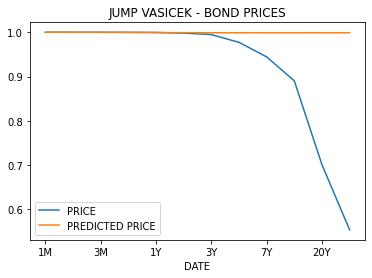

In [105]:
yield_curve_2_5_21['PREDICTED PRICE'] = prices
yield_curve_2_5_21[['PRICE', 'PREDICTED PRICE']].plot(legend=True, title='JUMP VASICEK - BOND PRICES')

In [106]:
std

array([1.30323849e-09, 4.43383939e-09, 6.85342780e-09, 5.48476229e-08,
       3.34306332e-07, 1.28152961e-06, 3.08153449e-06, 8.79458295e-06,
       1.61834882e-05, 2.20504582e-05, 3.74484254e-05, 5.61409241e-05])

In [112]:
abs(yield_curve_2_5_21['PRICE'] - yield_curve_2_5_21['PREDICTED PRICE'])[:5].mean()

0.00019330605709106942

In [111]:
abs(yield_curve_2_5_21['PRICE'] - yield_curve_2_5_21['PREDICTED PRICE'])[6:].mean()

0.15535905768202293

In [110]:
abs(yield_curve_2_5_21['PRICE'] - yield_curve_2_5_21['PREDICTED PRICE']).mean()

0.07784456142923632

# VASICEK - SWAP

In [113]:
xls = pd.ExcelFile('../data/treasury_swap_feb05.xlsx')
swap_rates = pd.read_excel(xls, 'Sheet1')[1:]
swap_rates.index = swap_rates['Term']
swap_rates['Mid'] = swap_rates['Mid']/100

In [114]:
sr = np.empty(len(swap_rates))
std = np.empty(len(swap_rates))

i = 0
for index, row in swap_rates.iterrows():
    T = int(row['Term'].split(" YR")[0])
    T = np.arange(T*2)/2
    sr[i], std[i] = pricing.swap_rate(26, 0.001, 100, 2, T)
    i = i + 1

<AxesSubplot:title={'center':'VASICEK - SWAP RATES'}, xlabel='Term'>

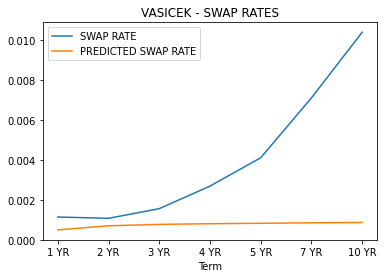

In [115]:
swap_rates['SWAP RATE'] = swap_rates['Mid']
swap_rates['PREDICTED SWAP RATE'] = sr
swap_rates[['SWAP RATE', 'PREDICTED SWAP RATE']].plot(legend=True, title='VASICEK - SWAP RATES')

In [116]:
std

array([6.11353241e-10, 1.34077023e-09, 1.10379558e-09, 1.38186501e-09,
       1.52095628e-09, 1.35437748e-09, 1.26372566e-09])

In [120]:
abs(swap_rates['SWAP RATE'] - swap_rates['PREDICTED SWAP RATE'])[:3].mean()

0.0006013331604201649

In [121]:
abs(swap_rates['SWAP RATE'] - swap_rates['PREDICTED SWAP RATE'])[4:].mean()

0.0063439506103904865

In [122]:
abs(swap_rates['SWAP RATE'] - swap_rates['PREDICTED SWAP RATE']).mean()

0.00324503196484816

# JUMP VASICEK - SWAP

In [123]:
sr = np.empty(len(swap_rates))
std = np.empty(len(swap_rates))

i = 0
for index, row in swap_rates.iterrows():
    T = int(row['Term'].split(" YR")[0])
    T = np.arange(T*2)/2
    sr[i], std[i] = jump_pricing.swap_rate(26, 0.001, 100, 2, T)
    i = i + 1

<AxesSubplot:title={'center':'JUMP VASICEK - SWAP RATES'}, xlabel='Term'>

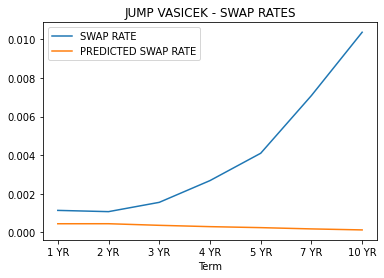

In [124]:
swap_rates['SWAP RATE'] = swap_rates['Mid']
swap_rates['PREDICTED SWAP RATE'] = sr
swap_rates[['SWAP RATE', 'PREDICTED SWAP RATE']].plot(legend=True, title='JUMP VASICEK - SWAP RATES')

In [125]:
std

array([5.33904320e-08, 3.86250254e-07, 7.15909814e-07, 1.31861325e-06,
       1.10929167e-06, 1.79269176e-06, 1.91870430e-06])

In [128]:
abs(swap_rates['SWAP RATE'] - swap_rates['PREDICTED SWAP RATE'])[:3].mean()

0.0008368419275747225

In [129]:
abs(swap_rates['SWAP RATE'] - swap_rates['PREDICTED SWAP RATE'])[4:].mean()

0.007007641421651177

In [130]:
abs(swap_rates['SWAP RATE'] - swap_rates['PREDICTED SWAP RATE']).mean()

0.0037030895385695753

# CIR - BOND

In [131]:
fitted_params = {
    "kappa": 0.4635,
    "mu_r": 0,
    "sigma": 0.0576,
    "mu": 0,
    "gamma": 0.01,
    "h": 10
}

In [132]:
cir = CIR(fitted_params)
pricing_cir = Pricing(cir)

In [133]:
prices = np.empty(len(yield_curve_2_5_21))
std = np.empty(len(yield_curve_2_5_21))

i = 0
for t in yield_curve_2_5_21['YEARS'].values:
    prices[i], std[i] = pricing_cir.bond_price(26, 0.001, 100, t)
    i = i+1

<AxesSubplot:title={'center':'CIR - BOND PRICES'}, xlabel='DATE'>

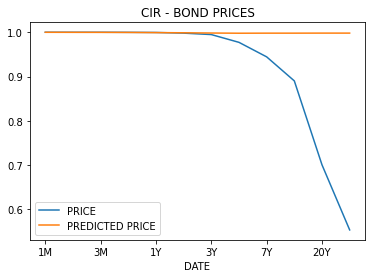

In [134]:
yield_curve_2_5_21['PREDICTED PRICE'] = prices
yield_curve_2_5_21[['PRICE', 'PREDICTED PRICE']].plot(legend=True, title='CIR - BOND PRICES')


In [135]:
std

array([5.84417048e-06, 1.75263638e-05, 3.12919125e-05, 9.39907476e-05,
       3.80864038e-04, 7.91621580e-04, 1.65006232e-03, 2.06025842e-03,
       2.46018130e-03, 2.49689685e-03, 1.82475351e-03, 2.19781503e-03])

In [138]:
abs(yield_curve_2_5_21['PRICE'] - yield_curve_2_5_21['PREDICTED PRICE'])[:5].mean()

0.00022573247259534136

In [139]:
abs(yield_curve_2_5_21['PRICE'] - yield_curve_2_5_21['PREDICTED PRICE'])[6:].mean()

0.1545502264597078

In [140]:
abs(yield_curve_2_5_21['PRICE'] - yield_curve_2_5_21['PREDICTED PRICE']).mean()

0.07743569969256898

# CIR - SWAP

In [141]:
sr = np.empty(len(swap_rates))
std = np.empty(len(swap_rates))

i = 0
for index, row in swap_rates.iterrows():
    T = int(row['Term'].split(" YR")[0])
    T = np.arange(T*2)/2
    sr[i], std[i] = pricing_cir.swap_rate(26, 0.001, 100, 2, T)
    i = i + 1

<AxesSubplot:title={'center':'CIR - SWAP RATES'}, xlabel='Term'>

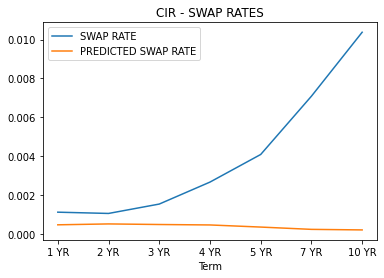

In [142]:
swap_rates['SWAP RATE'] = swap_rates['Mid']
swap_rates['PREDICTED SWAP RATE'] = sr
swap_rates[['SWAP RATE', 'PREDICTED SWAP RATE']].plot(legend=True, title='CIR - SWAP RATES')

In [143]:
std

array([0.00010608, 0.00028132, 0.00036367, 0.0004094 , 0.00040575,
       0.00028877, 0.00024399])

In [146]:
abs(swap_rates['SWAP RATE'] - swap_rates['PREDICTED SWAP RATE'])[:3].mean()

0.000745503897683709

In [147]:
abs(swap_rates['SWAP RATE'] - swap_rates['PREDICTED SWAP RATE'])[4:].mean()

0.006904434722168229

In [149]:
abs(swap_rates['SWAP RATE'] - swap_rates['PREDICTED SWAP RATE']).mean()

0.003592935267748337

# JUMP CIR - BOND

In [150]:
fitted_params = {
    "kappa": 0.4782,
    "mu_r": 0,
    "sigma": 0.04627,
    "mu": 0,
    "gamma": 0.0001648,
    "h": 10.03
}

In [151]:
jump_cir = JumpCIR(fitted_params)
pricing_jump_cir = Pricing(jump_cir)

In [152]:
prices = np.empty(len(yield_curve_2_5_21))
std = np.empty(len(yield_curve_2_5_21))

i = 0
for t in yield_curve_2_5_21['YEARS'].values:
    prices[i], std[i] = pricing_jump_cir.bond_price(26, 0.001, 100, t)
    i = i+1

<AxesSubplot:title={'center':'JUMP CIR - BOND PRICES'}, xlabel='DATE'>

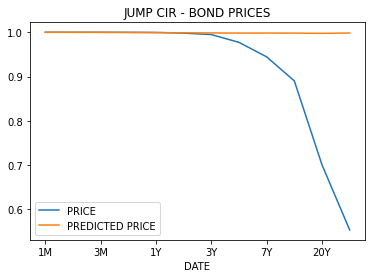

In [153]:
yield_curve_2_5_21['PREDICTED PRICE'] = prices
yield_curve_2_5_21[['PRICE', 'PREDICTED PRICE']].plot(legend=True, title='JUMP CIR - BOND PRICES')


In [154]:
std

array([3.98606270e-06, 1.27443560e-05, 1.74669335e-05, 7.02602465e-05,
       2.41569983e-04, 6.42666832e-04, 1.03637281e-03, 1.42052762e-03,
       1.82172572e-03, 1.86028998e-03, 2.55547569e-03, 1.28508235e-03])

In [157]:
abs(yield_curve_2_5_21['PRICE'] -  yield_curve_2_5_21['PREDICTED PRICE'])[:5].mean()

0.00022485249608403813

In [158]:
abs(yield_curve_2_5_21['PRICE'] -  yield_curve_2_5_21['PREDICTED PRICE'])[6:].mean()

0.15461638093091803

In [159]:
abs(yield_curve_2_5_21['PRICE'] -  yield_curve_2_5_21['PREDICTED PRICE']).mean()

0.0774617869174416

# JUMP CIR - SWAP

In [160]:
sr = np.empty(len(swap_rates))
std = np.empty(len(swap_rates))

i = 0
for index, row in swap_rates.iterrows():
    T = int(row['Term'].split(" YR")[0])
    T = np.arange(T*2)/2
    sr[i], std[i] = pricing_jump_cir.swap_rate(26, 0.001, 100, 2, T)
    i = i + 1

<AxesSubplot:title={'center':'JUMP CIR - SWAP RATES'}, xlabel='Term'>

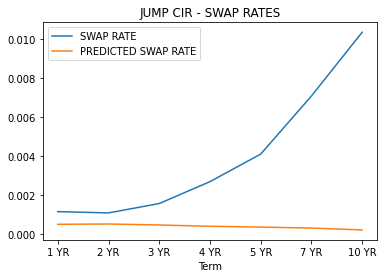

In [161]:
swap_rates['SWAP RATE'] = swap_rates['Mid']
swap_rates['PREDICTED SWAP RATE'] = sr
swap_rates[['SWAP RATE', 'PREDICTED SWAP RATE']].plot(legend=True, title='JUMP CIR - SWAP RATES')

In [162]:
std

array([8.07006420e-05, 1.73448635e-04, 2.16159734e-04, 2.36092213e-04,
       2.36715166e-04, 2.47215654e-04, 2.00905791e-04])

In [166]:
abs(swap_rates['SWAP RATE'] - swap_rates['PREDICTED SWAP RATE'])[:3].mean()

0.000775891837318644

In [167]:
abs(swap_rates['SWAP RATE'] - swap_rates['PREDICTED SWAP RATE'])[4:].mean()

0.006912987834874008

In [168]:
abs(swap_rates['SWAP RATE'] - swap_rates['PREDICTED SWAP RATE']).mean()

0.0036234929911705604